In [1]:
# imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import scipy.stats as sst
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Notebook variables
SEED_VALUE = 72
TRAIN_SIZE = 0.8
TEST_SIZE = 0.2

DEPTH = 5
ESTIMATORS = 5

trainDataPath = "../input/train.csv"
testDataPath = "../input/test.csv"

outputPath = "../output/submission-01.csv"


In [153]:
# Functions

# Function for comparing different approaches
def score_gradientboosting_model(X_train, X_valid, y_train, y_valid, n_estimators=200, max_depth=20):
    model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=SEED_VALUE, max_depth=max_depth)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds), accuracy_score(y_valid, preds)

def score_gradientboosting(X_train, X_valid, y_train, y_valid, params):
    scores = []

    for e in params["n_estimators"]:
      for d in params["depth"]:
        mae, accuracy = score_gradientboosting_model(X_train, X_valid, y_train, y_valid, n_estimators=e, max_depth=d)

        scores.append(
          {
            "type": "GradientBoostingClassifier",
            "mae": mae,
            "accuracy": accuracy,
            "estimators": e,
            "depth": d
          }
        )

    return scores


def score_randomforest_model(X_train, X_valid, y_train, y_valid, n_estimators=200, max_depth=20):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=SEED_VALUE, max_depth=max_depth)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds), accuracy_score(y_valid, preds)

def score_randomforest(X_train, X_valid, y_train, y_valid, params):
    scores = []

    for e in params["n_estimators"]:
      for d in params["depth"]:
        mae, accuracy = score_randomforest_model(X_train, X_valid, y_train, y_valid, n_estimators=e, max_depth=d)

        scores.append(
          {
            "type": "RandomForestClassifier",
            "mae": mae,
            "accuracy": accuracy,
            "estimators": e,
            "depth": d
          }
        )

    return scores

def score_decisiontree_model(X_train, X_valid, y_train, y_valid, max_depth=20):
    model = DecisionTreeClassifier(random_state=SEED_VALUE, max_depth=max_depth)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds), accuracy_score(y_valid, preds)

def score_decisiontree(X_train, X_valid, y_train, y_valid, params):
    scores = []

    for d in params["depth"]:
      mae, accuracy = score_decisiontree_model(X_train, X_valid, y_train, y_valid, max_depth=d)

      scores.append(
        {
          "type": "DecisionTreeClassifier",
          "mae": mae,
          "accuracy": accuracy,
          "depth": d
        }
      )

    return scores

def score_extratrees_model(X_train, X_valid, y_train, y_valid, n_estimators=200, max_depth=20):
    model = ExtraTreesClassifier(n_estimators=n_estimators, random_state=SEED_VALUE, max_depth=max_depth)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds), accuracy_score(y_valid, preds)

def score_extratrees(X_train, X_valid, y_train, y_valid, params):
    scores = []

    for e in params["n_estimators"]:
      for d in params["depth"]:
        mae, accuracy = score_extratrees_model(X_train, X_valid, y_train, y_valid, n_estimators=e, max_depth=d)

        scores.append(
          {
            "type": "ExtraTreesClassifier",
            "mae": mae,
            "accuracy": accuracy,
            "estimators": e,
            "depth": d
          }
        )

    return scores

def score_lsvc_model(X_train, X_valid, y_train, y_valid):
    model = LinearSVC(max_iter=10000)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds), accuracy_score(y_valid, preds)

def score_lsvc(X_train, X_valid, y_train, y_valid, params):
    scores = []

    mae, accuracy = score_lsvc_model(X_train, X_valid, y_train, y_valid)

    scores.append(
      {
        "type": "LinearSVC",
        "mae": mae,
        "accuracy": accuracy
      }
    )

    return scores



# def create_fare_bins(data, replacementValue):
#     binData = data.copy()

#     binData["Fare"] = binData["Fare"].fillna(replacementValue)

#     binData.loc[binData["Fare"] >= 0, "f_Fare"] = 0
#     binData.loc[binData["Fare"] > 25, "f_Fare"] = 1
#     binData.loc[binData["Fare"] > 50, "f_Fare"] = 2
#     binData.loc[binData["Fare"] > 75, "f_Fare"] = 3
#     binData.loc[binData["Fare"] > 100, "f_Fare"] = 4

#     return binData

# def create_age_bins(data, replacementValue):
#     binData = data.copy()

#     binData["Age"] = binData["Age"].fillna(replacementValue)

#     binData.loc[binData["Age"] >= 0, "f_Age"] = 0
#     binData.loc[binData["Age"] > 10, "f_Age"] = 1
#     binData.loc[binData["Age"] > 20, "f_Age"] = 2
#     binData.loc[binData["Age"] > 30, "f_Age"] = 3
#     binData.loc[binData["Age"] > 40, "f_Age"] = 4
#     binData.loc[binData["Age"] > 50, "f_Age"] = 5
#     binData.loc[binData["Age"] > 60, "f_Age"] = 6
#     binData.loc[binData["Age"] > 70, "f_Age"] = 7
#     binData.loc[binData["Age"] > 80, "f_Age"] = 8

#     return binData

# def create_sibsp_bins(data):
#     binData = data.copy()

#     binData.loc[binData["SibSp"] == 0, "f_SibSp"] = 0
#     binData.loc[binData["SibSp"] == 1, "f_SibSp"] = 1
#     binData.loc[binData["SibSp"] > 1, "f_SibSp"] = 2

#     return binData

# def create_parch_bins(data):
#     binData = data.copy()

#     binData.loc[binData["Parch"] == 0, "f_ParCh"] = 0
#     binData.loc[binData["Parch"] > 0, "f_ParCh"] = 1

#     return binData

# def create_sex_bins(data):
#     binData = data.copy()

#     maleTitles = ["Mr", "Master", "Don", "Rev", "Major", "Sir", "Col", "Capt"]
#     femaleTitles = ["Mrs", "Miss", "Mme", "Ms", "Lady", "Mlle", "Countess"]

#     binData["Title"] = binData['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

#     binData.loc[binData["Sex"].isna() & binData["Title"].isin(maleTitles), "f_Sex"] = "male"
#     binData.loc[binData["Sex"].isna() & binData["Title"].isin(femaleTitles), "f_Sex"] = "female"

#     binData.loc[binData["Sex"] == "male", "f_Sex"] = 0
#     binData.loc[binData["Sex"] == "female", "f_Sex"] = 1

#     return binData

# def create_cabin_code(data):
#     data["f_CabinCode"] = data["Cabin"].str.extract('(^.{0,1})')
#     data.loc[data["f_CabinCode"].isna(), "f_CabinCode"] = "U"

#     return data

# def create_cabin_bins(data):
#     binData = data.copy()

#     binData.loc[binData["f_CabinCode"] == "U", "f_Cabin"] = 0
#     binData.loc[binData["f_CabinCode"] != "U", "f_Cabin"] = 1

#     return binData

def create_homeplanet_bins(data):
    binData = data.copy()

    binData.loc[binData["HomePlanet"].isna(), "HomePlanet"] = "Unknown"

    return binData

def create_idgroup_bins(data):
    binData = data.copy()

    binData["f_GroupId"] = binData.apply(lambda row: row.name.split("_")[0], axis=1)
    binData["f_GroupCount"] = binData.groupby(["f_GroupId"])["f_GroupId"].transform("count")
    
    binData["f_GroupAlone"] = 1
    binData.loc[binData["f_GroupCount"] > 1, "f_GroupAlone"] = 0

    return binData

def create_cryo_bins(data):
    binData = data.copy()

    binData["f_Cryo"] = 0

    binData.loc[binData["CryoSleep"].isna(), "f_Cryo"] = 2

    binData.loc[(binData["CryoSleep"] == True), "f_Cryo"] = 1


    return binData

def create_features(data):
  featureData = data.copy()

  featureData = create_homeplanet_bins(featureData)
  featureData = create_idgroup_bins(featureData)
  featureData = create_cryo_bins(featureData)

  return featureData

def score_models(X_train, X_valid, y_train, y_valid):
  randomForestParams = {
    "n_estimators": [5, 10, 25, 50, 100],
    "depth": [1, 5, 10, 20]
  }

  gradientBoostingParams = {
    "n_estimators": [5, 10, 25, 50, 100],
    "depth": [1, 5, 10, 20]
  }

  decisionTreeParams = {
    "depth": [1, 5, 10, 20, 50, 100]
  }

  extraTreesParams = {
    "n_estimators": [5, 10, 25, 50, 100, 200, 500, 100],
    "depth": [1, 5, 10, 20, 50, 100]
  }

  linearSVCParams = {}

  scores = []
  scores = scores + (score_gradientboosting(X_train, X_valid, y_train, y_valid, gradientBoostingParams))
  scores = scores + (score_randomforest(X_train, X_valid, y_train, y_valid, randomForestParams))
  scores = scores + (score_decisiontree(X_train, X_valid, y_train, y_valid, decisionTreeParams))
  scores = scores + (score_extratrees(X_train, X_valid, y_train, y_valid, extraTreesParams))
  scores = scores + (score_lsvc(X_train, X_valid, y_train, y_valid, linearSVCParams))

  return scores


In [7]:
# Load initial data

rawData = pd.read_csv(trainDataPath, index_col="PassengerId")
rawTargetData = rawData.Transported
rawTrainData = rawData.drop(["Transported"], axis=1)

# Split up data
trainData, validationData, trainTarget, validationTarget = train_test_split(rawData, rawTargetData, train_size=TRAIN_SIZE, test_size=TEST_SIZE, random_state=SEED_VALUE)


## Pre-processing

### Home planet

- We will one-hot this

### Group Ids

- Having a look at group count and people alone and there doesn't seem to be a lot of useful information there

### Cryo sleep

- This seems very useful. There's a very high percentage of people that were in cryo that were transported.
- Another thing to look to combine this with is comparing cryo people transported to the deck they were in and see if any decks are more common
  - People in cryo can't leave their room so it's possible certain decks were affected more which will help us predict

<AxesSubplot:xlabel='f_Cryo', ylabel='Count'>

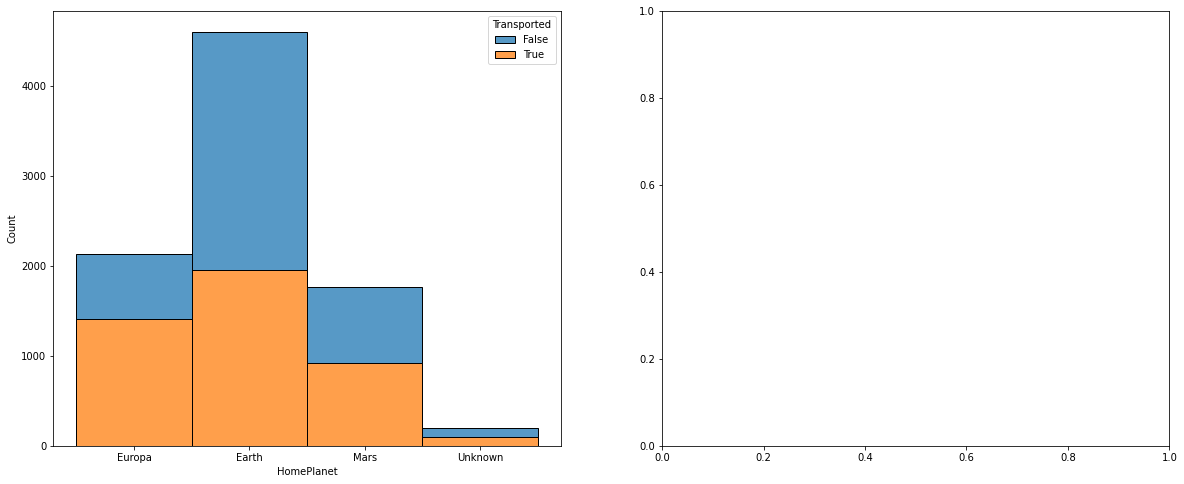

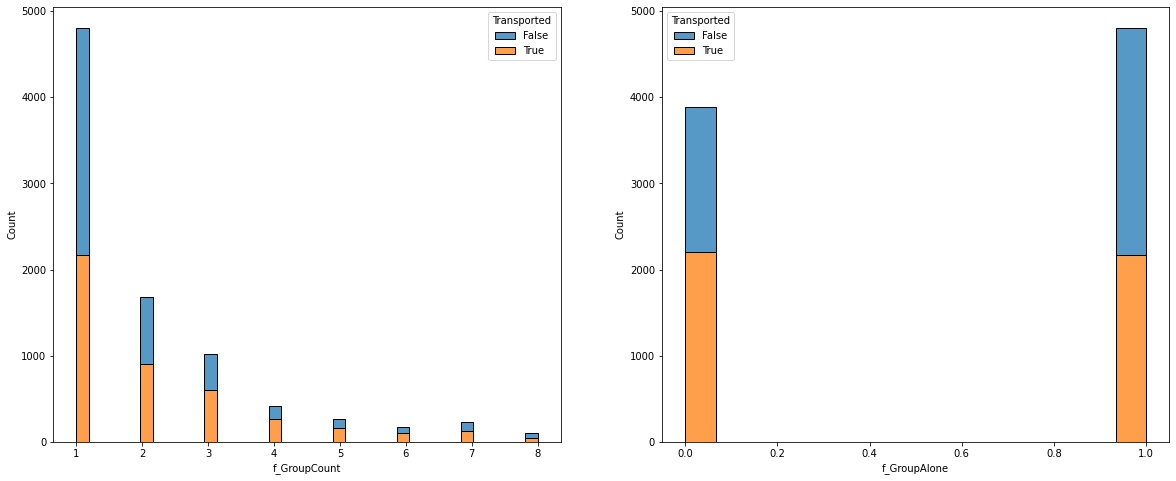

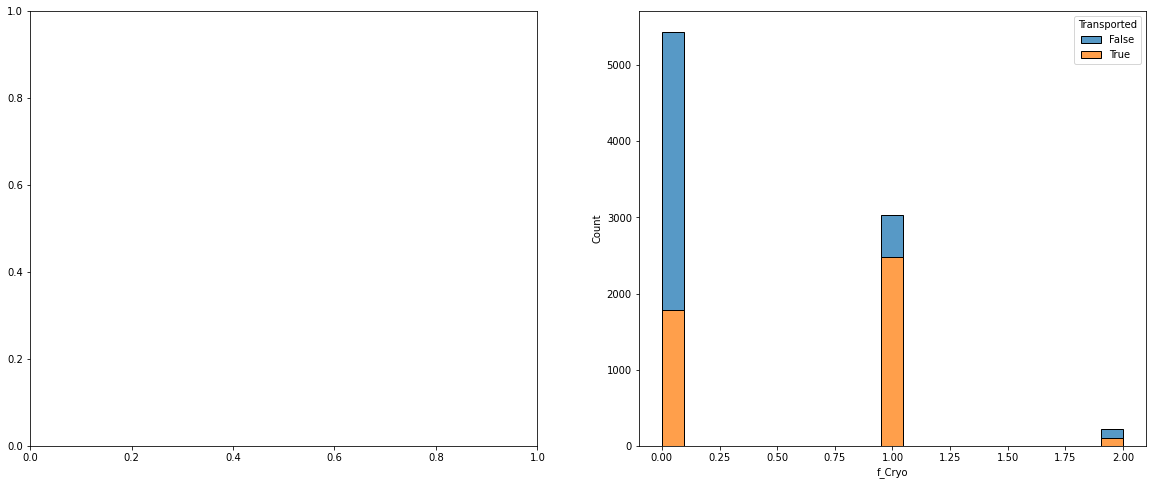

In [155]:
# Investigation

ppData = rawData.copy()

# # Create features
ppData = create_features(ppData)

fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.histplot(data = ppData, x = "HomePlanet", ax=ax[0], hue = "Transported", multiple="stack")

# GroupId processing
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.histplot(data = ppData, x = "f_GroupCount", ax=ax[0], hue = "Transported", multiple="stack")
sns.histplot(data = ppData, x = "f_GroupAlone", ax=ax[1], hue = "Transported", multiple="stack")

# Cryo processing
fig, ax = plt.subplots(1, 2, figsize=(20,8))
#sns.histplot(data = ppData, x = "CryoSleep", ax=ax[0], hue = "Transported", multiple="stack")
sns.histplot(data = ppData, x = "f_Cryo", ax=ax[1], hue = "Transported", multiple="stack")

# # Parch processing
# fig, ax = plt.subplots(1, 2, figsize=(20,8))
# sns.histplot(data = ppData, x = "Parch", ax=ax[0], hue = "Survived", multiple="stack")
# sns.histplot(data = ppData, x = "f_ParCh", ax=ax[1], hue = "Survived", multiple="stack")

# # Parch processing
# fig, ax = plt.subplots(1, 2, figsize=(20,8))
# sns.histplot(data = ppData, x = "Sex", ax=ax[0], hue = "Survived", multiple="stack")
# sns.histplot(data = ppData, x = "f_Sex", ax=ax[1], hue = "Survived", multiple="stack")

# # Cabin processing
# fig, ax = plt.subplots(1, 2, figsize=(20,8))
# sns.histplot(data = ppData, x = "f_CabinCode", ax=ax[0], hue = "Survived", multiple="stack")
# sns.histplot(data = ppData, x = "f_Cabin", ax=ax[1], hue = "Survived", multiple="stack")

# # Embaarked processing
# fig, ax = plt.subplots(1, 2, figsize=(20,8))
# sns.histplot(data = ppData, x = "Embarked", ax=ax[0], hue = "Survived", multiple="stack")
# sns.histplot(data = ppData, x = "f_Embarked", ax=ax[1], hue = "Survived", multiple="stack")



## Create and test models


In [63]:
# Create and test models

# Features to use
features = ["f_Age", "f_Fare", "f_SibSp", "f_ParCh", "f_Sex", "f_Cabin", "Pclass", "f_Embarked"]

# Create datasets
modelTrain = create_features(trainData, meanFare, meanAge)
modelTrain = modelTrain[features]

modelValidation = create_features(validationData, meanFare, meanAge)
modelValidation = modelValidation[features]

scores = []

scores = pd.DataFrame(score_models(modelTrain, modelValidation, trainTarget, validationTarget))

print(scores.loc[scores["type"] == "LinearSVC"].sort_values("accuracy", ascending=False))

scores.sort_values("accuracy", ascending=False)



         type       mae  accuracy  estimators  depth
94  LinearSVC  0.212291  0.787709         NaN    NaN


,type,mae,accuracy,estimators,depth
1,GradientBoostingClassifier,0.156425,0.843575,5.0,5.0
13,GradientBoostingClassifier,0.167598,0.832402,50.0,5.0
5,GradientBoostingClassifier,0.167598,0.832402,10.0,5.0
25,RandomForestClassifier,0.167598,0.832402,10.0,5.0
37,RandomForestClassifier,0.173184,0.826816,100.0,5.0
...,...,...,...,...,...
46,ExtraTreesClassifier,0.284916,0.715084,5.0,1.0
58,ExtraTreesClassifier,0.284916,0.715084,25.0,1.0
32,RandomForestClassifier,0.290503,0.709497,50.0,1.0
24,RandomForestClassifier,0.312849,0.687151,10.0,1.0


In [9]:
# Create final model and submission file

model = GradientBoostingClassifier(n_estimators=ESTIMATORS, random_state=SEED_VALUE, max_depth=DEPTH)
model.fit(ppData[features], rawTargetData)

testData = pd.read_csv(testDataPath, index_col="PassengerId")
testData = create_features(testData, meanFare, meanAge)

predictions = model.predict(testData[features])

testData["Survived"] = predictions
testData["Survived"].to_csv(outputPath)